In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
import scipy.stats as stats  

In [2]:
df = pd.read_csv('dataset_group.csv')

In [51]:
df.Product.value_counts()

Product
poultry                         640
soda                            597
cereals                         591
ice cream                       579
cheeses                         578
waffles                         575
soap                            574
bagels                          573
lunch meat                      573
juice                           570
eggs                            570
toilet paper                    569
dinner rolls                    567
aluminum foil                   566
coffee/tea                      565
shampoo                         562
beef                            561
paper towels                    556
flour                           555
butter                          555
milk                            555
mixes                           554
dishwashing liquid/detergent    551
all- purpose                    551
ketchup                         548
yogurt                          545
individual meals                544
tortillas           

In [54]:
print(df.groupby(['Order_id', 'Product']).size().reset_index(name='Count'))

       Order_id            Product  Count
0             1       all- purpose      3
1             1      aluminum foil      1
2             1               beef      1
3             1             butter      1
4             1       dinner rolls      2
...         ...                ...    ...
15906      1138            waffles      1
15907      1138             yogurt      1
15908      1139  laundry detergent      1
15909      1139            shampoo      1
15910      1139               soda      1

[15911 rows x 3 columns]


In [4]:
df.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [55]:
df.tail()

,Date,Order_id,Product
20636,2020-02-25,1138,soda
20637,2020-02-25,1138,paper towels
20638,2020-02-26,1139,soda
20639,2020-02-26,1139,laundry detergent
20640,2020-02-26,1139,shampoo


In [5]:
df.shape

(20641, 3)

In [42]:
df.isnull().sum()

Date        0
Order_id    0
Product     0
dtype: int64

In [43]:
df.duplicated().sum() 

4730

In [46]:
df_datesplit.duplicated().sum()

4730

In [45]:
df_datesplit.duplicated().sum()

<bound method DataFrame.duplicated of             Date  Order_id            Product
0     2018-01-01         1             yogurt
1     2018-01-01         1               pork
2     2018-01-01         1      sandwich bags
3     2018-01-01         1         lunch meat
4     2018-01-01         1       all- purpose
...          ...       ...                ...
20636 2020-02-25      1138               soda
20637 2020-02-25      1138       paper towels
20638 2020-02-26      1139               soda
20639 2020-02-26      1139  laundry detergent
20640 2020-02-26      1139            shampoo

[20641 rows x 3 columns]>

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_id,20641.0,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20641 non-null  datetime64[ns]
 1   Order_id  20641 non-null  int64         
 2   Product   20641 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 483.9+ KB


In [8]:
df_datesplit = df.copy()

In [9]:
df_datesplit['YEAR'] = pd.PeriodIndex(df_datesplit['Date'], freq='Y')
df_datesplit['MONTH'] = pd.PeriodIndex(df_datesplit['Date'], freq='M')
df_datesplit['QUARTER'] = pd.PeriodIndex(df_datesplit['Date'], freq='Q')
df_datesplit['WEEK'] = pd.PeriodIndex(df_datesplit['Date'], freq='W')

In [10]:
df_datesplit['DAY'] = df_datesplit.Date.dt.strftime('%A')
df_datesplit['MONTH_NAME'] = df_datesplit['Date'].dt.strftime('%b')

In [12]:
df_datesplit.head()

,Date,Order_id,Product,YEAR,MONTH,QUARTER,WEEK,DAY,MONTH_NAME
0,2018-01-01,1,yogurt,2018,2018-01,2018Q1,2018-01-01/2018-01-07,Monday,Jan
1,2018-01-01,1,pork,2018,2018-01,2018Q1,2018-01-01/2018-01-07,Monday,Jan
2,2018-01-01,1,sandwich bags,2018,2018-01,2018Q1,2018-01-01/2018-01-07,Monday,Jan
3,2018-01-01,1,lunch meat,2018,2018-01,2018Q1,2018-01-01/2018-01-07,Monday,Jan
4,2018-01-01,1,all- purpose,2018,2018-01,2018Q1,2018-01-01/2018-01-07,Monday,Jan


In [13]:
df_datesplit.tail()

,Date,Order_id,Product,YEAR,MONTH,QUARTER,WEEK,DAY,MONTH_NAME
20636,2020-02-25,1138,soda,2020,2020-02,2020Q1,2020-02-24/2020-03-01,Tuesday,Feb
20637,2020-02-25,1138,paper towels,2020,2020-02,2020Q1,2020-02-24/2020-03-01,Tuesday,Feb
20638,2020-02-26,1139,soda,2020,2020-02,2020Q1,2020-02-24/2020-03-01,Wednesday,Feb
20639,2020-02-26,1139,laundry detergent,2020,2020-02,2020Q1,2020-02-24/2020-03-01,Wednesday,Feb
20640,2020-02-26,1139,shampoo,2020,2020-02,2020Q1,2020-02-24/2020-03-01,Wednesday,Feb


In [14]:
print('First date of Sales data = ', min(df_datesplit['Date']))
print('Last date of Sales data = ', max(df_datesplit['Date']))

First date of Sales data =  2018-01-01 00:00:00
Last date of Sales data =  2020-02-26 00:00:00


In [15]:
df3 = df_datesplit.copy()
df_yr = pd.DataFrame(df3[['YEAR', 'Order_id', 'Product']].groupby('YEAR').agg({'Order_id': 'nunique',
                                                                  'Product': 'count'}))
newname = {'Order_id': 'Num_of_Orders', 'Product': 'Num_of_Products'}
df_yr.rename(columns=newname, inplace=True)
df_yr

,Num_of_Orders,Num_of_Products
YEAR,,
2018,533,9479
2019,507,9333
2020,99,1829


In [18]:
df3 = df_datesplit.copy()
df_qtr = pd.DataFrame(df3[['QUARTER', 'Order_id', 'Product']].groupby('QUARTER').agg({'Order_id': 'nunique',
                                                                  'Product': 'count'}))
newname = {'Order_id': 'Num_of_Orders', 'Product': 'Num_of_Products'}
df_qtr.rename(columns=newname, inplace=True)
df_qtr

,Num_of_Orders,Num_of_Products
QUARTER,,
2018Q1,175,3114
2018Q2,178,3047
2018Q3,180,3318
2019Q1,180,3354
2019Q2,170,3054
2019Q3,157,2925
2020Q1,99,1829


In [21]:
df3 = df_datesplit.copy()
df_month = pd.DataFrame(df3[['MONTH', 'Order_id', 'Product']].groupby('MONTH').agg({'Order_id': 'nunique',
                                                                  'Product': 'count'}))
newname = {'Order_id': 'Num_of_Orders', 'Product': 'Num_of_Products'}
df_month.rename(columns=newname, inplace=True)
df_month

,Num_of_Orders,Num_of_Products
MONTH,,
2018-01,62,1170
2018-02,55,907
2018-03,58,1037
2018-04,55,962
2018-05,67,1155
2018-06,56,930
2018-07,62,1054
2018-08,59,1159
2018-09,59,1105


In [24]:
df3 = df_datesplit.copy()
df_week = pd.DataFrame(df3[['WEEK', 'Order_id', 'Product']].groupby('WEEK').agg({'Order_id': 'nunique',
                                                                  'Product': 'count'}))
newname = {'Order_id': 'Num_of_Orders', 'Product': 'Num_of_Products'}
df_week.rename(columns=newname, inplace=True)
df_week

,Num_of_Orders,Num_of_Products
WEEK,,
2018-01-01/2018-01-07,15,285
2018-01-08/2018-01-14,15,247
2018-01-15/2018-01-21,17,350
2018-01-22/2018-01-28,8,151
2018-01-29/2018-02-04,17,304
...,...,...
2020-01-27/2020-02-02,10,204
2020-02-03/2020-02-09,13,202
2020-02-10/2020-02-16,10,183


In [26]:
df_week['Num_of_Orders'].mean()

12.943181818181818

In [27]:
df_week['Num_of_Orders'].median()

13.0

In [28]:
df_week['Num_of_Products'].mean()


234.5568181818182

In [29]:
df_week['Num_of_Products'].median()

232.0

In [32]:
df['Product'].value_counts()

Product
poultry                         640
soda                            597
cereals                         591
ice cream                       579
cheeses                         578
waffles                         575
soap                            574
bagels                          573
lunch meat                      573
juice                           570
eggs                            570
toilet paper                    569
dinner rolls                    567
aluminum foil                   566
coffee/tea                      565
shampoo                         562
beef                            561
paper towels                    556
flour                           555
butter                          555
milk                            555
mixes                           554
dishwashing liquid/detergent    551
all- purpose                    551
ketchup                         548
yogurt                          545
individual meals                544
tortillas           

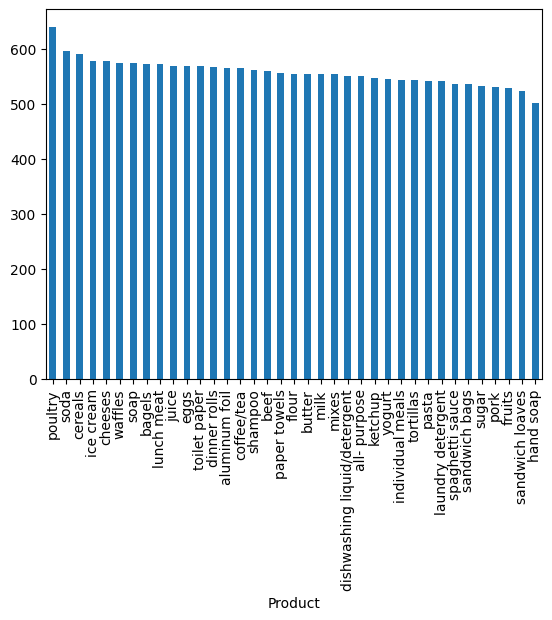

In [33]:
df['Product'].value_counts().plot(kind='bar');
plt.savefig('prod_bar.jpg', bbox_inches='tight');

In [34]:
df3 = df_datesplit.copy()
df_day = pd.DataFrame(df3[['DAY', 'Order_id', 'Product']].groupby('DAY').agg({'Order_id': 'nunique',
                                                                  'Product': 'count'}))
newname = {'Order_id': 'Num_of_Orders', 'Product': 'Num_of_Products'}
df_day.rename(columns=newname, inplace=True)
df_day

,Num_of_Orders,Num_of_Products
DAY,,
Friday,167,3044
Monday,143,2600
Saturday,169,2988
Sunday,169,3109
Thursday,167,2969
Tuesday,157,2943
Wednesday,167,2988


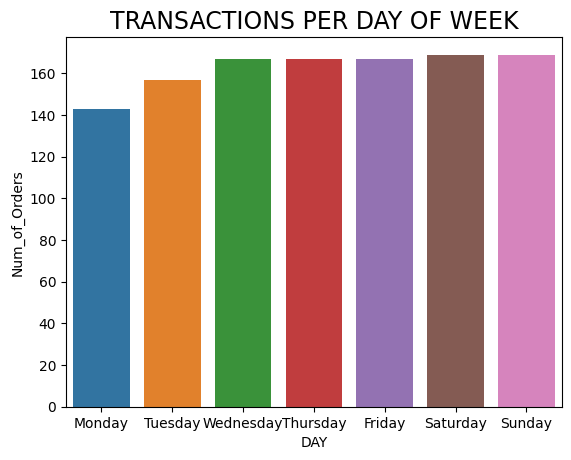

In [35]:
sns.barplot(x=df_day.index.sort_values(ascending=True), y=df_day['Num_of_Orders'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);
plt.title('TRANSACTIONS PER DAY OF WEEK', fontsize=17);
plt.savefig('week_bar.jpg', bbox_inches='tight');

In [36]:
df3 = df_datesplit.copy()
df_monthname = pd.DataFrame(df3[['MONTH_NAME', 'Order_id', 'Product']].groupby('MONTH_NAME').agg({'Order_id': 'nunique',
                                                                  'Product': 'count'}))
newname = {'Order_id': 'Num_of_Orders', 'Product': 'Num_of_Products'}
df_monthname.rename(columns=newname, inplace=True)
df_monthname

,Num_of_Orders,Num_of_Products
MONTH_NAME,,
Apr,110,1937
Aug,107,2120
Feb,156,2815
Jan,174,3227
Jul,115,1997
Jun,105,1827
Mar,124,2255
May,133,2337
Sep,115,2126


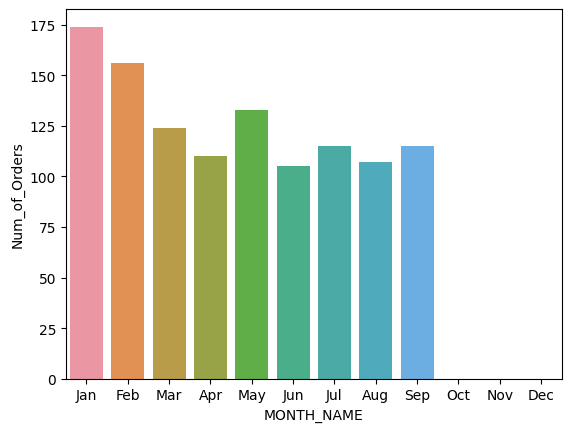

In [37]:
sns.barplot(x=df_monthname.index, y=df_monthname['Num_of_Orders'], order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.savefig('monthwise_orders.jpg', bbox_inches='tight');

In [38]:
df.head()

,Date,Order_id,Product
0,2018-01-01,1,yogurt
1,2018-01-01,1,pork
2,2018-01-01,1,sandwich bags
3,2018-01-01,1,lunch meat
4,2018-01-01,1,all- purpose


In [40]:
df_grpbydate = pd.DataFrame(df.groupby('Date').agg({'Order_id': 'nunique', 'Product': 'count'}))
df_grpbydate.head()

,Order_id,Product
Date,,
2018-01-01,2,39
2018-01-02,4,80
2018-01-03,1,22
2018-01-04,2,13
2018-01-05,2,60


In [41]:
print('Total Num of Orders (Invoices) =', sum(df_grpbydate['Order_id']))
print('Total Num of Products  =', sum(df_grpbydate['Product']))

Total Num of Orders (Invoices) = 1139
Total Num of Products  = 20641
